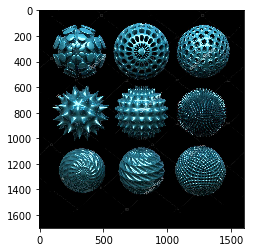

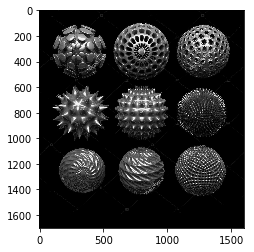

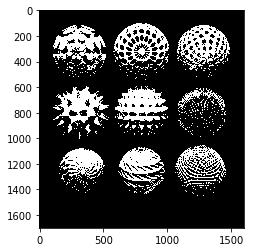

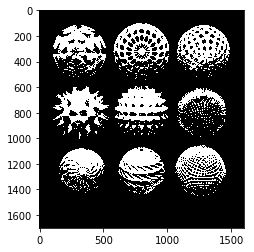

(3646, array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32))
(1620, array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32))
(175, array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32))


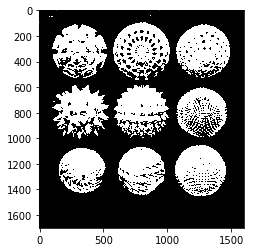

In [99]:
import numpy as np
import cv2 as cv
%matplotlib inline
import matplotlib.pyplot as plt
def get_rect():
    return cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
img = cv.imread(r"d://rec3.jpg")
plt.imshow(img)
plt.show(block=False)
img_colorless = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
plt.imshow(img_colorless,cmap='gray')
plt.show(block=False)
ret2,img_binarised = cv.threshold(img_colorless,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(img_binarised,cmap='gray')
plt.show(block=False)
closing = cv.morphologyEx(img_binarised, cv.MORPH_CLOSE, get_rect())
plt.imshow(closing,cmap='gray')
plt.show(block=False)
dilation = cv.dilate(closing,get_rect(),iterations = 2)
plt.imshow(dilation,cmap='gray')

print(cv.connectedComponents(img_binarised))
print(cv.connectedComponents(closing))
print(cv.connectedComponents(dilation))
plt.show()


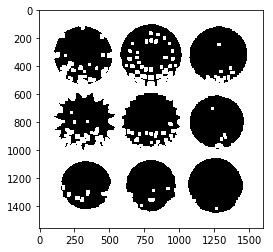

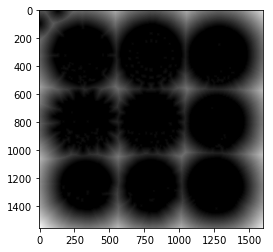

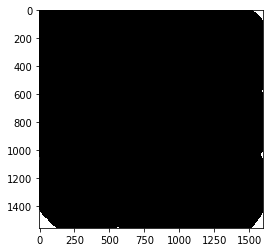

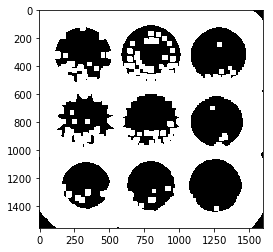

8


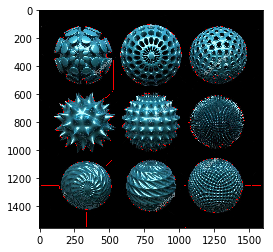

In [108]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
img = cv2.imread(r"d://rec31.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 5)


plt.imshow(opening,cmap='gray')
plt.show(block=False)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
plt.imshow(dist_transform,cmap='gray')
plt.show(block=False)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
plt.imshow(sure_fg,cmap='gray')
plt.show(block=False)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown,cmap='gray')
plt.show(block=False)
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg,connectivity=8)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
print(ret)
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
try:
    os.remove("result.jpg")
except OSError:
    pass
cv.imwrite("result.jpg",img)
plt.imshow(img)
plt.show()